**Step 1: Load Dataset And Perform the EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
# Load dataset
df = pd.read_csv('/content/employee_attrition_data.csv')

In [3]:
# Display first few rows
print(df.head())

   Employee_ID  Age  Gender   Department Job_Title  Years_at_Company  \
0            0   27    Male    Marketing   Manager                 9   
1            1   53  Female        Sales  Engineer                10   
2            2   59  Female    Marketing   Analyst                 8   
3            3   42  Female  Engineering   Manager                 1   
4            4   44  Female        Sales  Engineer                10   

   Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
0            0.586251                    151                      0   60132   
1            0.261161                    221                      1   79947   
2            0.304382                    184                      0   46958   
3            0.480779                    242                      0   40662   
4            0.636244                    229                      1   74307   

   Attrition  
0          0  
1          0  
2          1  
3          0  
4          0  


In [4]:
# EDA: Basic statistics
print(df.describe())

       Employee_ID          Age  Years_at_Company  Satisfaction_Level  \
count  1000.000000  1000.000000       1000.000000         1000.000000   
mean    499.500000    42.205000          5.605000            0.505995   
std     288.819436    10.016452          2.822223            0.289797   
min       0.000000    25.000000          1.000000            0.001376   
25%     249.750000    33.000000          3.000000            0.258866   
50%     499.500000    43.000000          6.000000            0.505675   
75%     749.250000    51.000000          8.000000            0.761135   
max     999.000000    59.000000         10.000000            0.999979   

       Average_Monthly_Hours  Promotion_Last_5Years        Salary    Attrition  
count            1000.000000            1000.000000   1000.000000  1000.000000  
mean              199.493000               0.486000  64624.980000     0.495000  
std                29.631908               0.500054  20262.984333     0.500225  
min               

In [5]:
# EDA: Checking for null values
print(df.isnull().sum())

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64


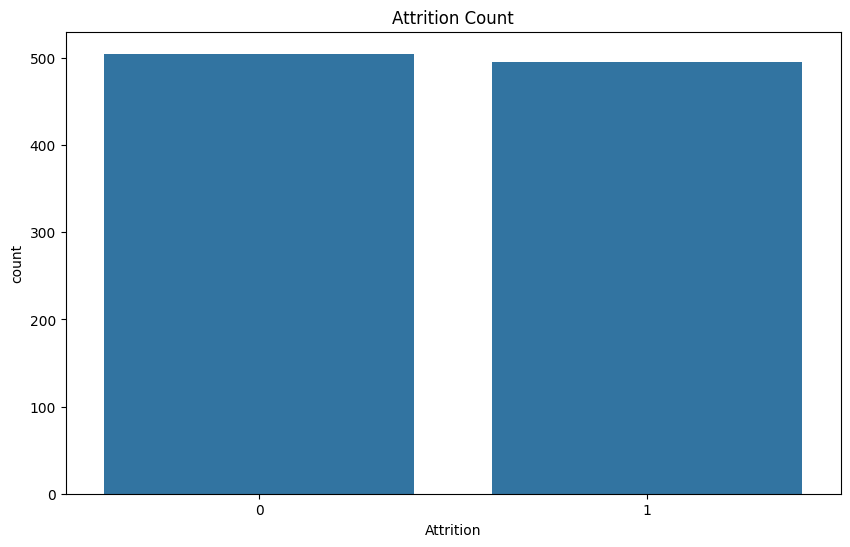

In [6]:
# EDA: Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()

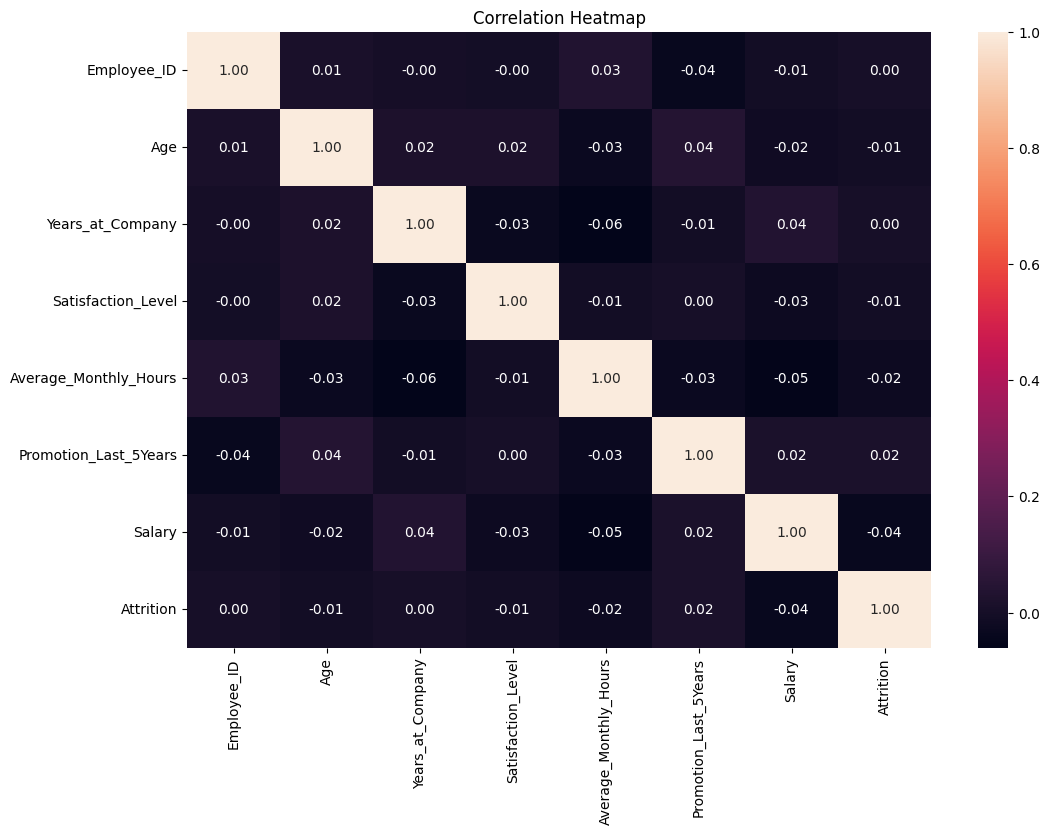

In [9]:
# Handle non-numerical columns before calculating correlations
df_numeric = df.select_dtypes(include=['number'])  # Select only numerical columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Step 2: Splitting the Dataset**

In [10]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Splitting the dataset into features and target variable
X = df.drop('Attrition', axis=1)  # Drop the original 'Attrition' column
y = df['Attrition']  # Target variable remains as 'Attrition'

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Preprocessing**

In [16]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 4: Implementing the Models**

**SVM Model**

In [17]:
# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [18]:
# Evaluating the SVM model
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

SVM Accuracy: 0.475
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.39      0.43       102
           1       0.47      0.56      0.51        98

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200

SVM Confusion Matrix:
 [[40 62]
 [43 55]]


**K-Nearest Neighbors Model**

In [19]:
# Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [20]:
# Evaluating the KNN model
knn_predictions = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

KNN Accuracy: 0.475
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       102
           1       0.46      0.47      0.47        98

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200

KNN Confusion Matrix:
 [[49 53]
 [52 46]]


**Linear Regression Model**

In [21]:
# Training the Linear Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Evaluating the Linear Regression model
lr_predictions = lr_model.predict(X_test_scaled)
print("Linear Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Linear Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("Linear Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))

Linear Regression Accuracy: 0.45
Linear Regression Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46       102
           1       0.44      0.44      0.44        98

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

Linear Regression Confusion Matrix:
 [[47 55]
 [55 43]]


**LSTM Model**

In [43]:
# Reshape the data for LSTM [samples, time steps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [44]:
# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Add accuracy metric here
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)

Epoch 1/20
25/25 - 2s - loss: 0.6957 - accuracy: 0.4812 - val_loss: 0.6926 - val_accuracy: 0.4900 - 2s/epoch - 91ms/step
Epoch 2/20
25/25 - 0s - loss: 0.6910 - accuracy: 0.5238 - val_loss: 0.6957 - val_accuracy: 0.4850 - 93ms/epoch - 4ms/step
Epoch 3/20
25/25 - 0s - loss: 0.6877 - accuracy: 0.5475 - val_loss: 0.6989 - val_accuracy: 0.4750 - 93ms/epoch - 4ms/step
Epoch 4/20
25/25 - 0s - loss: 0.6853 - accuracy: 0.5700 - val_loss: 0.7022 - val_accuracy: 0.4700 - 103ms/epoch - 4ms/step
Epoch 5/20
25/25 - 0s - loss: 0.6827 - accuracy: 0.5738 - val_loss: 0.7057 - val_accuracy: 0.4700 - 98ms/epoch - 4ms/step
Epoch 6/20
25/25 - 0s - loss: 0.6803 - accuracy: 0.5888 - val_loss: 0.7100 - val_accuracy: 0.4550 - 82ms/epoch - 3ms/step
Epoch 7/20
25/25 - 0s - loss: 0.6778 - accuracy: 0.5950 - val_loss: 0.7124 - val_accuracy: 0.4850 - 83ms/epoch - 3ms/step
Epoch 8/20
25/25 - 0s - loss: 0.6762 - accuracy: 0.5925 - val_loss: 0.7160 - val_accuracy: 0.4700 - 95ms/epoch - 4ms/step
Epoch 9/20
25/25 - 0s - 

In [46]:
# Evaluating the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print("LSTM Accuracy:", lstm_accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 0.4550
LSTM Accuracy: 0.45500001311302185


In [47]:
# Predicting with the LSTM model
lstm_predictions = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
print("LSTM Classification Report:\n", classification_report(y_test, lstm_predictions))
print("LSTM Confusion Matrix:\n", confusion_matrix(y_test, lstm_predictions))

7/7 [==============================] - 0s 2ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.47      0.47       102
           1       0.44      0.44      0.44        98

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.46      0.45       200

LSTM Confusion Matrix:
 [[48 54]
 [55 43]]


In [49]:
# Print available keys in LSTM training history
print(lstm_model.history.history.keys())

dict_keys([])


**Step 5: Stock Analysis Chart**


In [51]:
# Compile the model with the accuracy metric
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to your training data (assuming X_train_lstm and y_train are defined)
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Now you should be able to access the accuracy
if 'accuracy' in lstm_model.history.history:
    accuracy_key = 'accuracy'
    val_accuracy_key = 'val_accuracy'
elif 'acc' in lstm_model.history.history:
    accuracy_key = 'acc'
    val_accuracy_key = 'val_acc'
else:
    raise KeyError("Accuracy key not found in LSTM training history.")

# Access the training history
print(lstm_model.history.history.keys())

Epoch 1/10
20/20 [==============================] - 4s 63ms/step - loss: 0.6505 - accuracy: 0.6203 - val_loss: 0.6423 - val_accuracy: 0.6313
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6406 - val_loss: 0.6445 - val_accuracy: 0.6438
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6391 - val_loss: 0.6471 - val_accuracy: 0.6438
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6406 - val_loss: 0.6482 - val_accuracy: 0.6313
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.6438 - val_loss: 0.6489 - val_accuracy: 0.6313
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.6453 - val_loss: 0.6504 - val_accuracy: 0.6500
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.6578 - val_loss: 0.6520 - val_accuracy: 0.6438
Epoch 8/10
20/20 [=

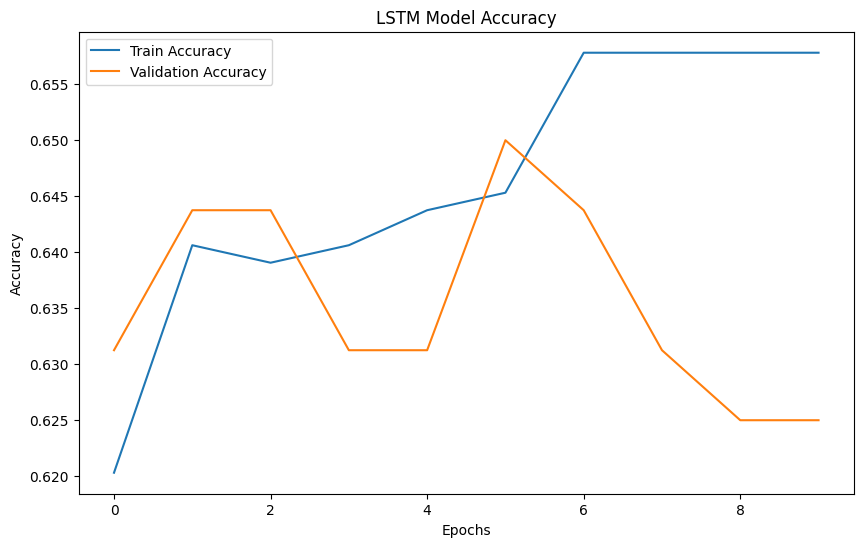

In [52]:
# Plotting training history for LSTM
plt.figure(figsize=(10, 6))
plt.plot(lstm_model.history.history[accuracy_key], label='Train Accuracy')
plt.plot(lstm_model.history.history[val_accuracy_key], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()